In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
df.shape

(81, 5)

In [6]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


#  box plot


In [7]:
# Define a function "plot_boxplot"

def plot_boxplot(df,ft): # Data frame and feature
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

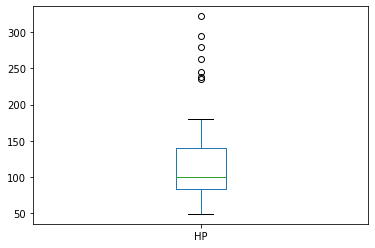

In [8]:
plot_boxplot(df, "HP")

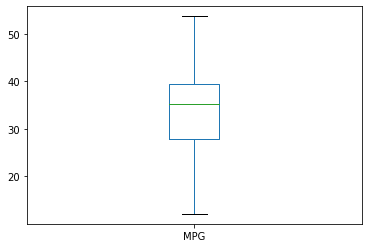

In [9]:
plot_boxplot(df, "MPG")

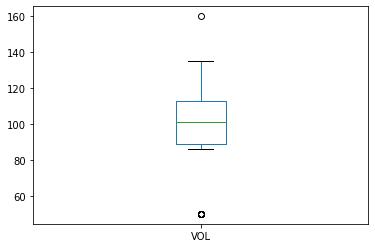

In [10]:
plot_boxplot(df, "VOL")

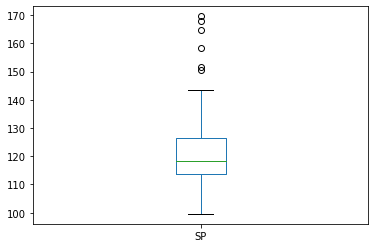

In [11]:
plot_boxplot(df, "SP")

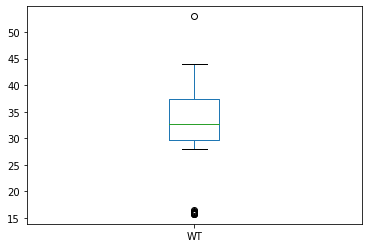

In [12]:
plot_boxplot(df, "WT")

# Finding outliers

In [15]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    IQR = q3 - q1
    
    Lower_bound = q1 - 1.5 * IQR
    Upper_bound = q3 + 1.5 * IQR
    
# Creating list using lower and upper bound
    Is = df.index[(df[ft] < Lower_bound) | (df[ft] > Upper_bound)]
# 1st condition is any values samller than lower band
# 2nd condition is any values higher than upper band 
# with help of or operator | 
# Either of conditions returns to true its an outlier 
    return Is

In [16]:
# Creating an empty list to store the output indices from multiple columns
index_list = []
for columns in ['HP', 'MPG', 'VOL','SP','WT']:
    index_list.extend(outliers(df,columns))

index_list

[69,
 70,
 76,
 77,
 78,
 79,
 80,
 7,
 8,
 11,
 17,
 25,
 65,
 70,
 73,
 76,
 78,
 69,
 70,
 76,
 77,
 78,
 79,
 7,
 8,
 11,
 17,
 25,
 65,
 70,
 73,
 76,
 78]

# Removing outliers

In [17]:
# define a function  called "remove" which returns  a cleaned data frame without outliers
# we need two arguments data frame and index lists

def remove(df,Is):
    Is = sorted(set(Is)) 
# Need to sort out the outliers in the dataframe
    df = df.drop(Is) 
# Using drop function we are droping the outliers from the data frame
    return df

df_clean = remove(df,index_list)
df_clean.shape # Outliers are been removed


(67, 5)

In [18]:
df.shape

(81, 5)

In [19]:
# checking the cleaned data has a outliers or not

# Boxplot 

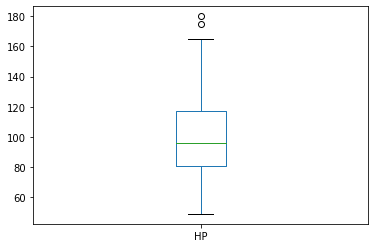

In [20]:
plot_boxplot(df_clean, 'HP')

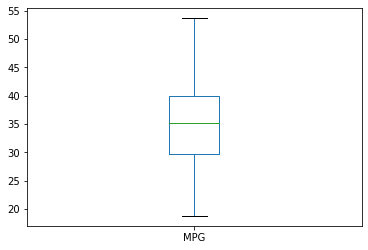

In [21]:
plot_boxplot(df_clean, 'MPG')

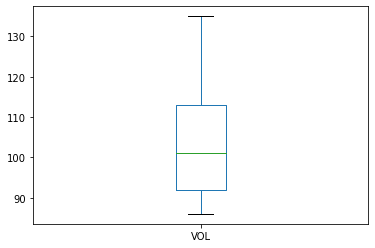

In [22]:
plot_boxplot(df_clean, 'VOL')

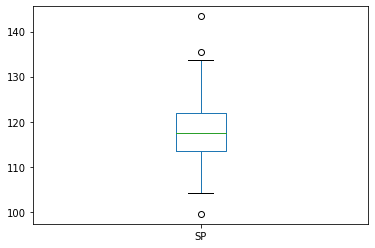

In [23]:
plot_boxplot(df_clean, 'SP')

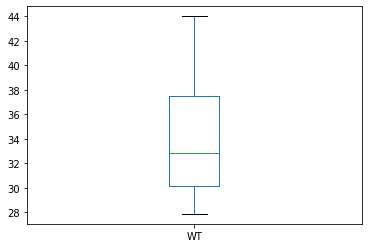

In [24]:
plot_boxplot(df_clean, 'WT')

In [25]:
# Outliers is minimized

In [26]:
df_clean.to_csv('cleaned_cars.csv', index=False) #Saving the cleaned dataset